In [72]:
import pandas as pd
import matplotlib.pyplot as plt


orig = pd.read_csv('output_utf.csv')

clean = pd.read_csv('output_clean.csv')



f"{len(orig.columns)} x {len(orig)} ---> {len(clean.columns)} x {len(clean)}"


'61 x 2778 ---> 42 x 2778'

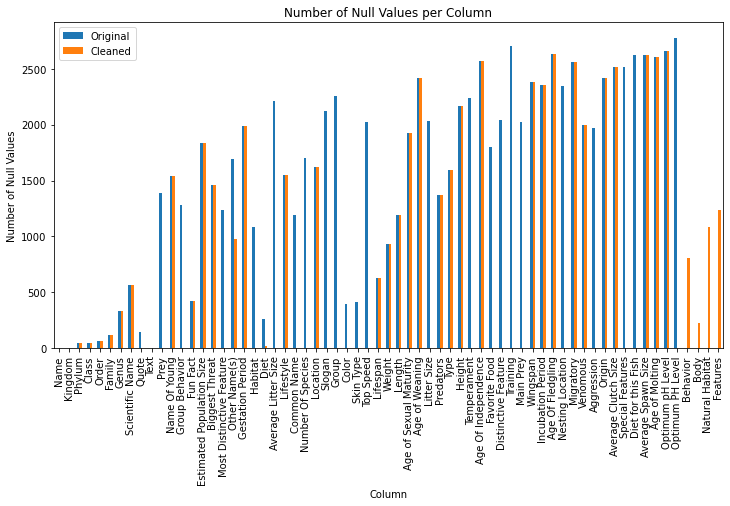

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the original and cleaned data sets
orig = pd.read_csv('output_utf.csv')
clean = pd.read_csv('output_clean.csv')

# Calculate the number of null values per column in the original and cleaned data sets
orig_null_counts = orig.isnull().sum()
clean_null_counts = clean.isnull().sum()

# Combine the null counts into a single data frame
null_counts = pd.concat([orig_null_counts, clean_null_counts], axis=1)
null_counts.columns = ['Original', 'Cleaned']

# Create a bar plot comparing the null counts
null_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Number of Null Values per Column')
plt.xlabel('Column')
plt.ylabel('Number of Null Values')
plt.show()







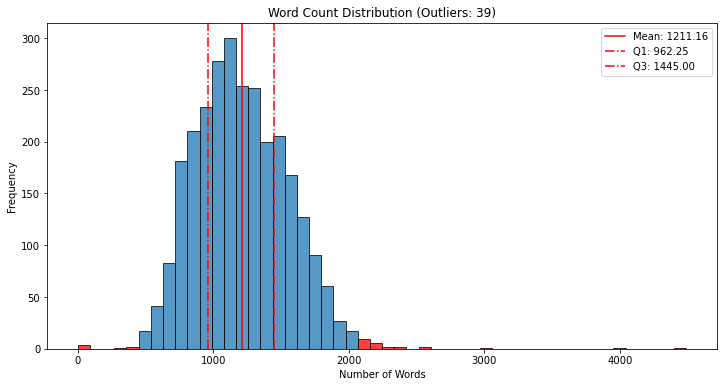

In [80]:
# Tokenize the text and count the number of words in each row
clean['word_count'] = clean['Text'].apply(lambda x: len(str(x).split()))

import numpy as np
import matplotlib.pyplot as plt

# Calculate the mean and standard deviation of the word count distribution
mean = np.mean(clean['word_count'])
std = np.std(clean['word_count'])

# Calculate the z-score for each value in the distribution
z_scores = (clean['word_count'] - mean) / std

threshold = 2.3 # lower means more outliers

# Count the number of values that are more than 3 standard deviations away from the mean
outlier_count = len(z_scores[abs(z_scores) > threshold])

# Create a histogram of the word count distribution
fig, ax = plt.subplots(figsize=(12, 6))
n, bins, patches = ax.hist(clean['word_count'], bins=50, alpha=0.75, edgecolor='black') # Add edgecolor parameter

# Add vertical lines for the mean, median, and quartiles
median = np.median(clean['word_count'])
q1, q3 = np.percentile(clean['word_count'], [25, 75])
ax.axvline(mean, color='r', linestyle='-', label=f'Mean: {mean:.2f}')
ax.axvline(q1, color='r', linestyle='-.', label=f'Q1: {q1:.2f}')
ax.axvline(q3, color='r', linestyle='-.', label=f'Q3: {q3:.2f}')

# Highlight the outliers in red
for i in range(len(patches)):
    if bins[i] > mean + threshold * std or bins[i] < mean - threshold * std:
        patches[i].set_fc('r')

# Add labels and legend
ax.set_title(f'Word Count Distribution (Outliers: {outlier_count})')
ax.set_xlabel('Number of Words')
ax.set_ylabel('Frequency')
ax.legend()

plt.show()


## Null Before vs After Cleaning


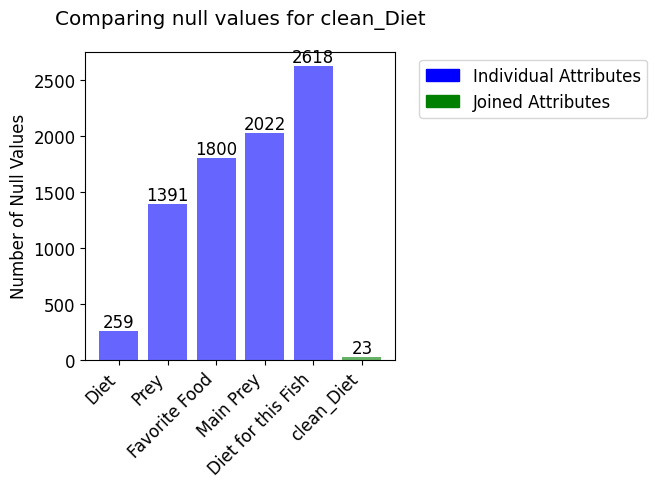

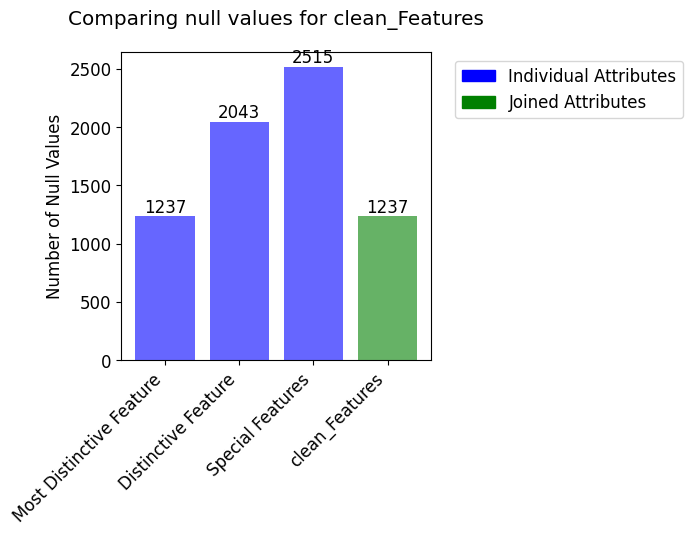

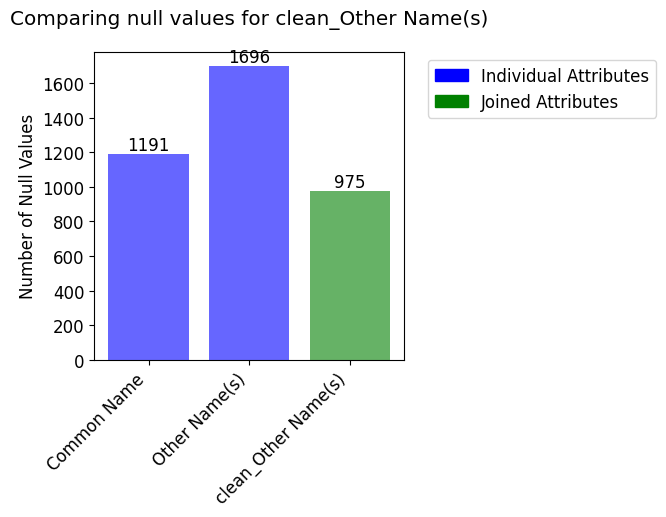

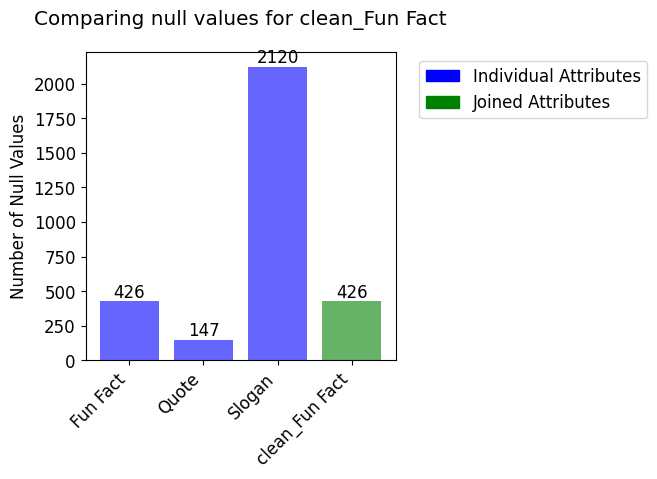

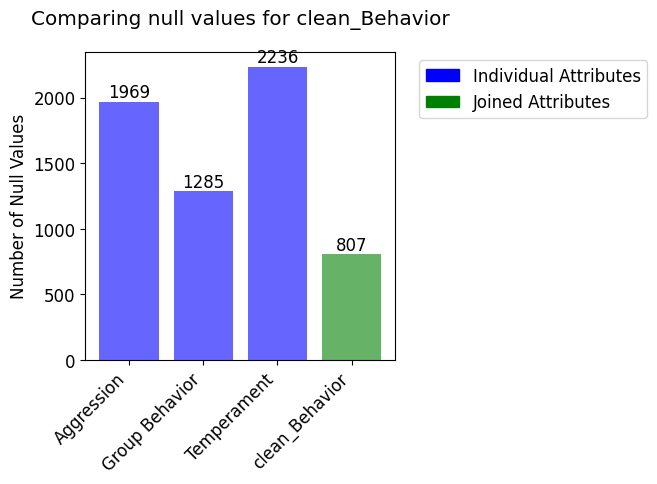

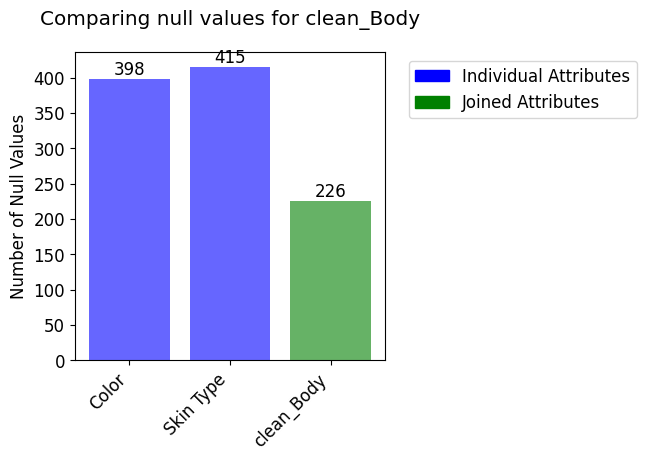

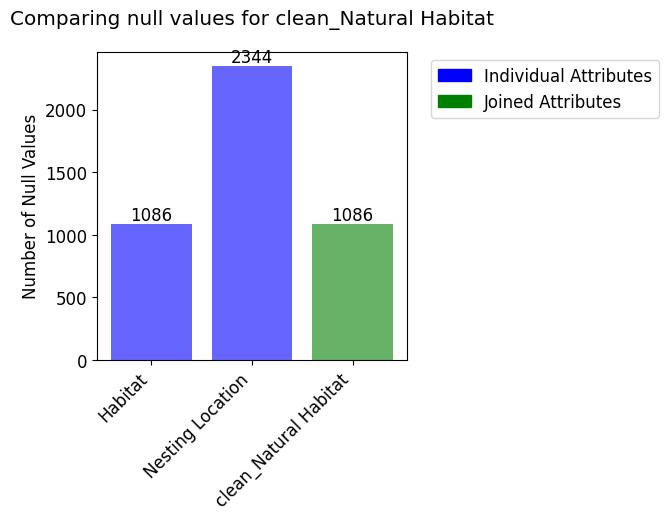

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

column_mappings = {
    'Diet + Prey + Favorite Food + Main Prey + Diet for this Fish': 'Diet',
    'Most Distinctive Feature + Distinctive Feature + Special Features': 'Features',
    'Common Name + Other Name(s)': 'Other Name(s)',
    'Fun Fact + Quote + Slogan': 'Fun Fact',
    'Aggression + Group Behavior + Temperament': 'Behavior',
    'Color + Skin Type': 'Body',
    'Habitat + Nesting Location': 'Natural Habitat'
}

titles = [
    'Diet', 'Features', 'Other Name(s)', 'Fun Fact', 'Behavior', 'Body', 'Natural Habitat'
]

# Iterate over each column mapping and generate a new plot
for i, (line, mapped_column) in enumerate(column_mappings.items()):
    # Create a new figure for each plot
    plt.figure(figsize=(4, 4))

    # Calculate the number of null values before joining
    null_counts_before = df[line.split(' + ')].isnull().sum()
    # Calculate the number of null values after joining
    null_counts_after = clean[mapped_column].isnull().sum()

    null_counts_before[f'clean_{mapped_column}'] = null_counts_after

    # Create a bar plot for each line with different colors
    colors = ['blue' if col != f'clean_{mapped_column}' else 'green' for col in null_counts_before.index]
    x_positions = np.arange(len(null_counts_before))
    plt.bar(x_positions, null_counts_before.values, color=colors, alpha=0.6)
    plt.title(f'Comparing null values for clean_{titles[i]}', pad=20)  # Add space between title and plot
    plt.ylabel('Number of Null Values')

    # Set the x-axis labels
    plt.xticks(x_positions, null_counts_before.index, rotation=45, ha='right')

    for x, y in zip(x_positions, null_counts_before.values):
        plt.text(x, y, str(y), ha='center', va='bottom')

    legend_labels = {
        'blue': 'Individual Attributes',
        'green': 'Joined Attributes'
    }
    handles = [plt.Rectangle((0, 0), 1, 1, color=color, label=label) for color, label in legend_labels.items()]
    plt.legend(handles=handles, loc='upper left', bbox_to_anchor=(1.05, 1))

    # Display the plot
    plt.show()


## Aggression

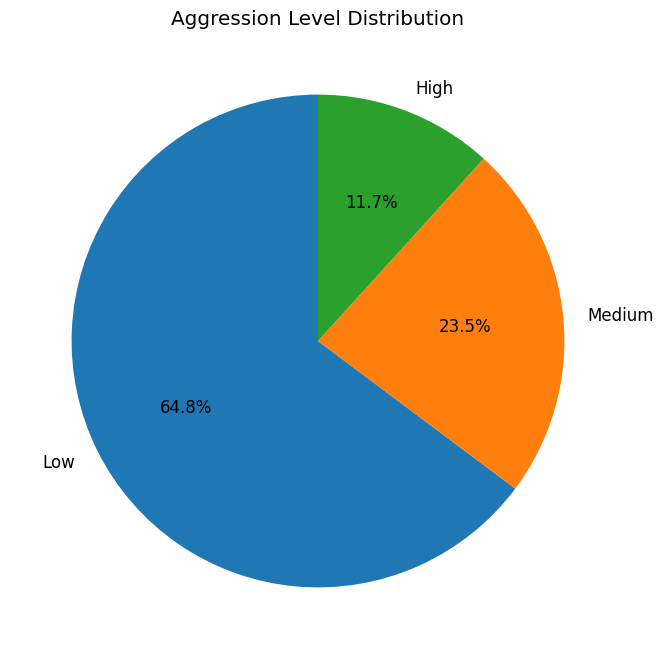

In [ ]:
plt.figure(figsize=(8, 8))

df['Aggression'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)

plt.title('Aggression Level Distribution')
plt.ylabel("")
plt.show()

## Temperament

In [ ]:
import re

temp_count = {}
pattern = r",|and"
for elem in df['Temperament'].str.lower():
    if(pd.isna(elem)): continue
    for prey in re.split(pattern, elem):
        if not prey.strip(): 
            continue
        if(prey.strip() not in temp_count):
            temp_count[prey.strip()] = 1
        else:
            temp_count[prey.strip()] += 1


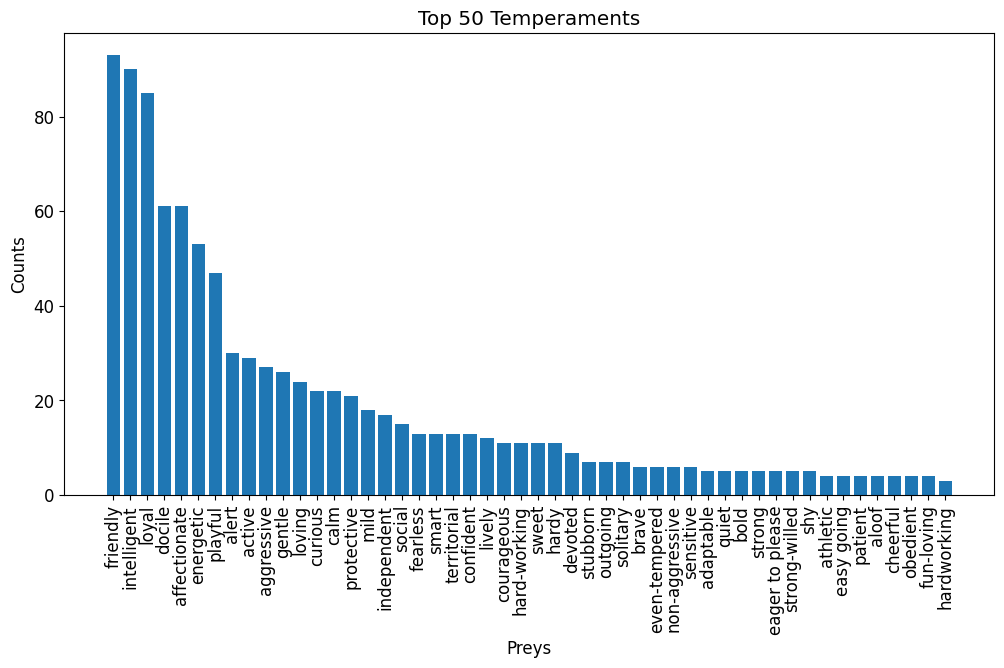

In [ ]:
temperament_data = sorted(temp_count.items(), key=lambda x: x[1], reverse=True)
top = 50

temp_values = [item[0] for item in temperament_data[:top]]
temp_counts = [item[1] for item in temperament_data[:top]]

plt.figure(figsize=(12, 6))

# Plot for preys
plt.bar(temp_values, temp_counts)
plt.title(f'Top {top} Temperaments')
plt.xlabel('Preys')
plt.ylabel('Counts')
plt.tick_params(axis='x', rotation=90)

## Prey/Predator

In [ ]:
import re

preys_count = {}
pattern = r",|and"
for elem in df['Prey'].str.lower():
    if(pd.isna(elem)): continue
    for prey in re.split(pattern, elem):
        if not prey.strip(): 
            continue
        if(prey.strip() not in preys_count):
            preys_count[prey.strip()] = 1
        else:
            preys_count[prey.strip()] += 1

predator_count = {}
pattern = r",|and"
for elem in df['Predators'].str.lower():
    if(pd.isna(elem)): continue
    for prey in re.split(pattern, elem):
        if not prey.strip(): 
            continue
        if(prey.strip() not in predator_count):
            predator_count[prey.strip()] = 1
        else:
            predator_count[prey.strip()] += 1

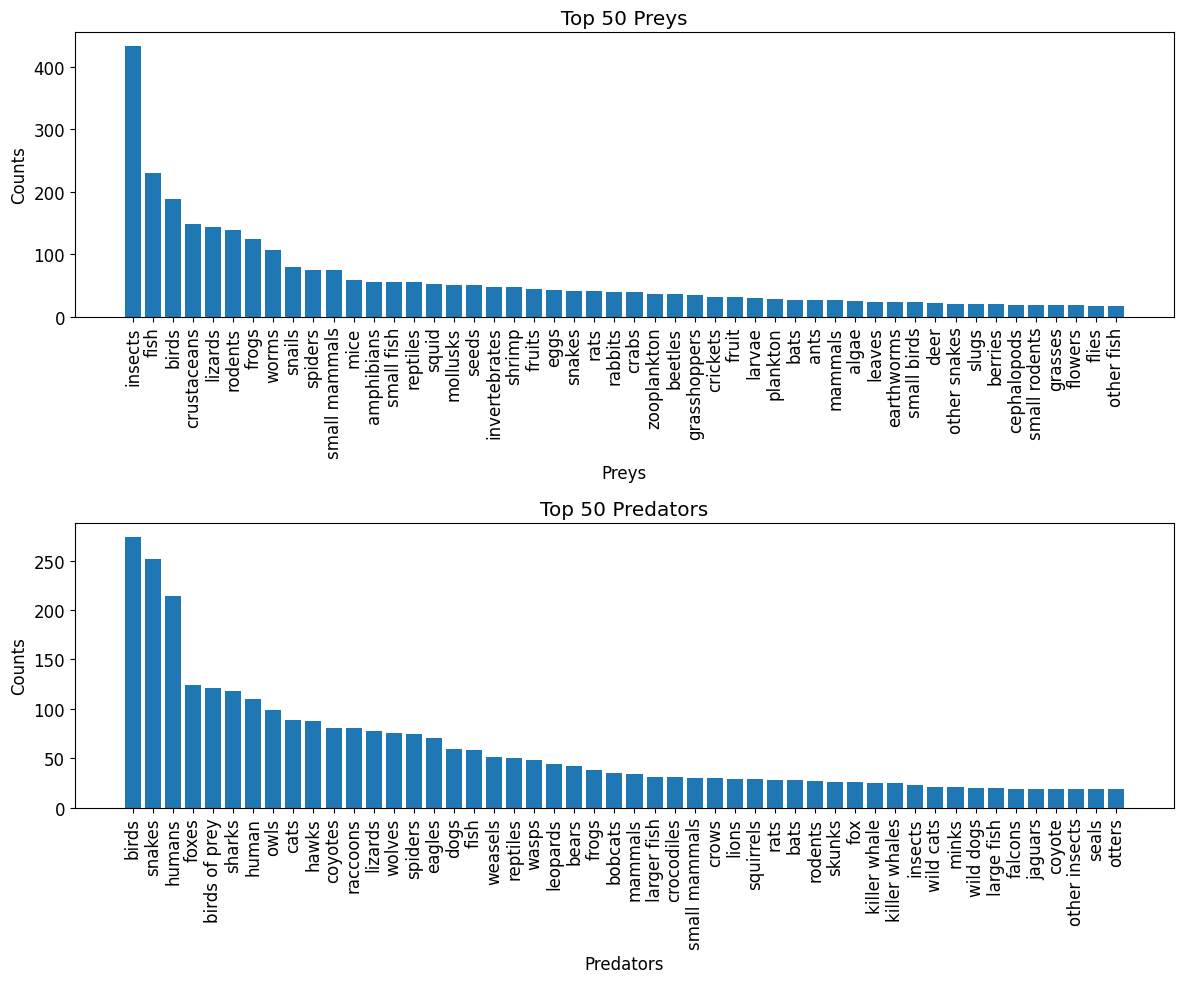

In [ ]:
preys_data = sorted(preys_count.items(), key=lambda x: x[1], reverse=True)
predator_data = sorted(predator_count.items(), key=lambda x: x[1], reverse=True)

top = 50

preys_values = [item[0] for item in preys_data[:top]]
preys_counts = [item[1] for item in preys_data[:top]]

predator_values = [item[0] for item in predator_data[:top]]
predator_counts = [item[1] for item in predator_data[:top]]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot for preys
ax1.bar(preys_values, preys_counts)
ax1.set_title(f'Top {top} Preys')
ax1.set_xlabel('Preys')
ax1.set_ylabel('Counts')
ax1.tick_params(axis='x', rotation=90)

# Plot for predators
ax2.bar(predator_values, predator_counts)
ax2.set_title(f'Top {top} Predators')
ax2.set_xlabel('Predators')
ax2.set_ylabel('Counts')
ax2.tick_params(axis='x', rotation=90)

plt.tight_layout()

plt.show()

## Biggest Threat

In [ ]:
threat_count = {}

pattern = r",|and|\n"
for elem in df['Biggest Threat'].str.lower():
    if(pd.isna(elem)): continue
    for threat in re.split(pattern, elem):
        if not threat.strip(): 
            continue
        if(threat.strip() not in threat_count):
            threat_count[threat.strip()] = 1
        else:
            threat_count[threat.strip()] += 1

threat_count = pd.Series(threat_count)

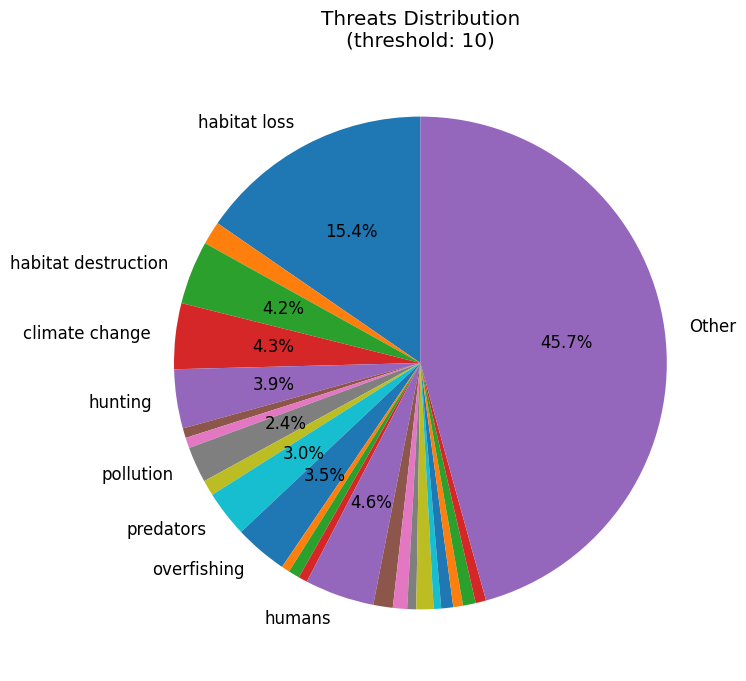

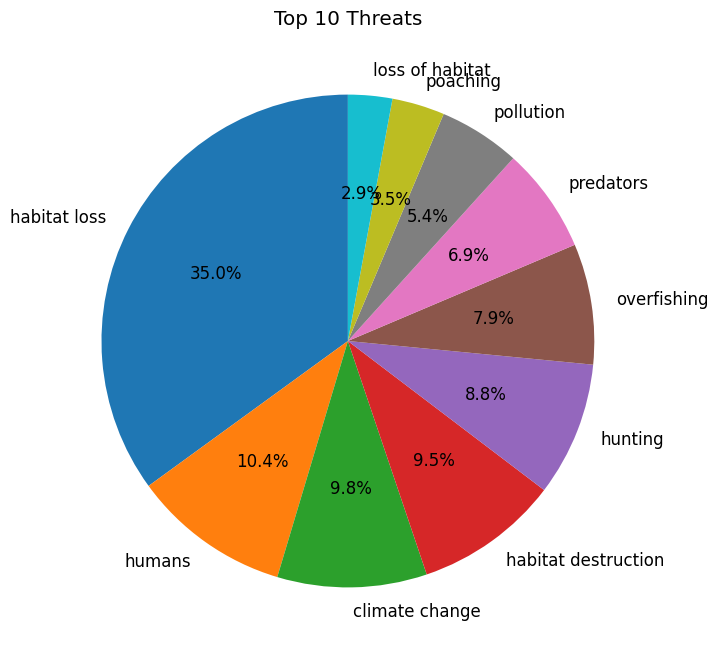

In [ ]:
threshold = 10
percentage_threshold = 2
top_N = 10

grouped_counts = threat_count[threat_count >= threshold]
grouped_counts['Other'] = threat_count[threat_count < threshold].sum()

plt.figure(figsize=(8, 8))

plt.pie(
    grouped_counts.values,
    labels=['' if pct < percentage_threshold else label for label, pct in zip(grouped_counts.index, grouped_counts / grouped_counts.sum() * 100)],
    autopct=lambda pct: f'{pct:.1f}%' if pct >= percentage_threshold else '',  # Display percentages for >=5% slices
    startangle=90,
)
plt.title(f'Threats Distribution\n(threshold: {threshold})')

plt.show()


top_N_counts = threat_count.nlargest(top_N)

plt.figure(figsize=(8, 8))

plt.pie(
    top_N_counts.values,
    labels=top_N_counts.index,
    autopct='%1.1f%%',
    startangle=90,
)
plt.title(f'Top {top_N} Threats')
# Show the subplots
plt.show()



## Genus

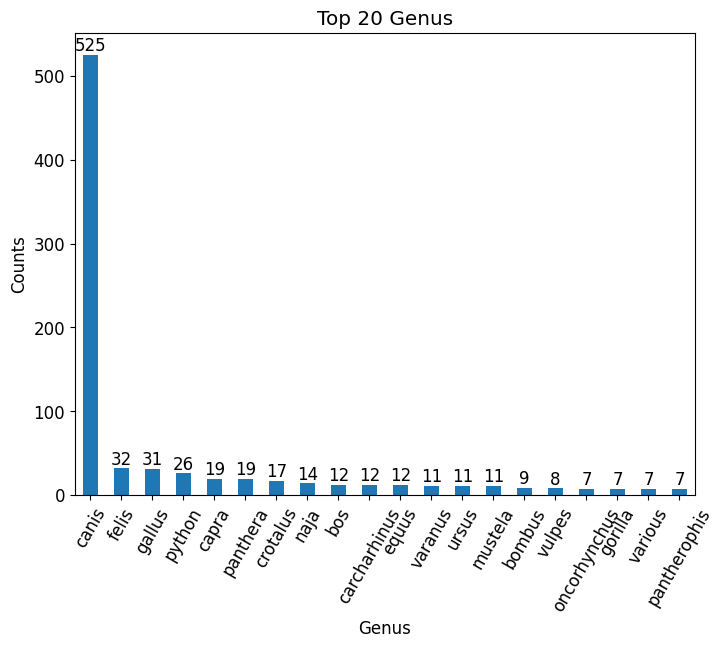

In [ ]:
genus_top  = 20

value_counts = clean['Genus'].str.lower().value_counts()

plt.figure(figsize=(8, 6))

ax = value_counts.head(genus_top).plot(kind='bar')

plt.xticks(rotation=60)

plt.xlabel('Genus')
plt.ylabel('Counts')
plt.title(f'Top {genus_top} Genus')

for i, v in enumerate(value_counts.head(genus_top)):
    ax.text(i, v, str(v), ha='center', va='bottom')


plt.show()


## Genus Canis - Scientific names

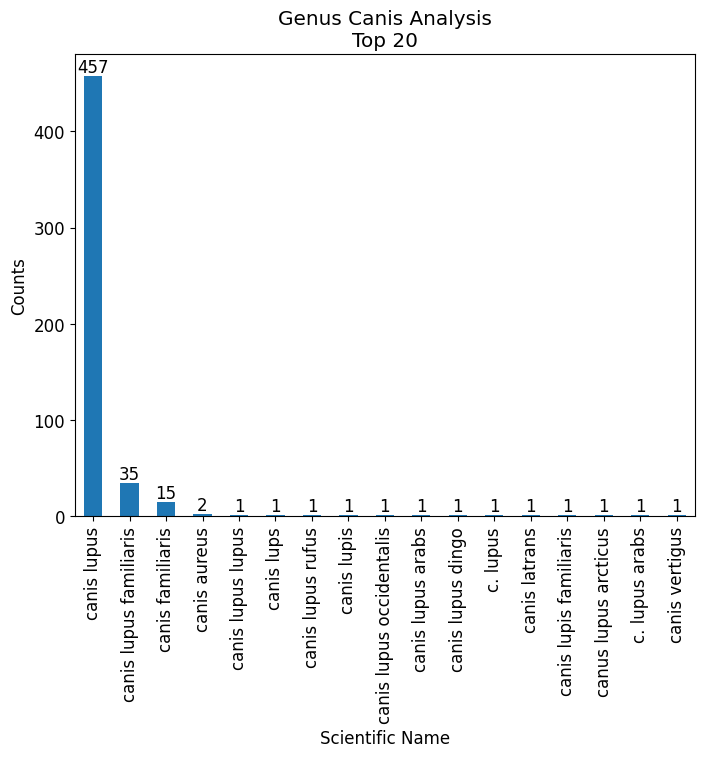

In [ ]:
value_counts = clean[clean['Genus'] == 'Canis']['Scientific Name'].str.lower().value_counts()

scientific_names_top = 20

plt.figure(figsize=(8, 6))

ax = value_counts.head(scientific_names_top).plot(kind='bar')

plt.xticks(rotation=90)

plt.xlabel('Scientific Name')
plt.ylabel('Counts')
plt.title(f'Genus Canis Analysis\nTop {scientific_names_top}')

for i, v in enumerate(value_counts.head(genus_top)):
    ax.text(i, v, str(v), ha='center', va='bottom')


# Show the plot
plt.show()

## Phylum

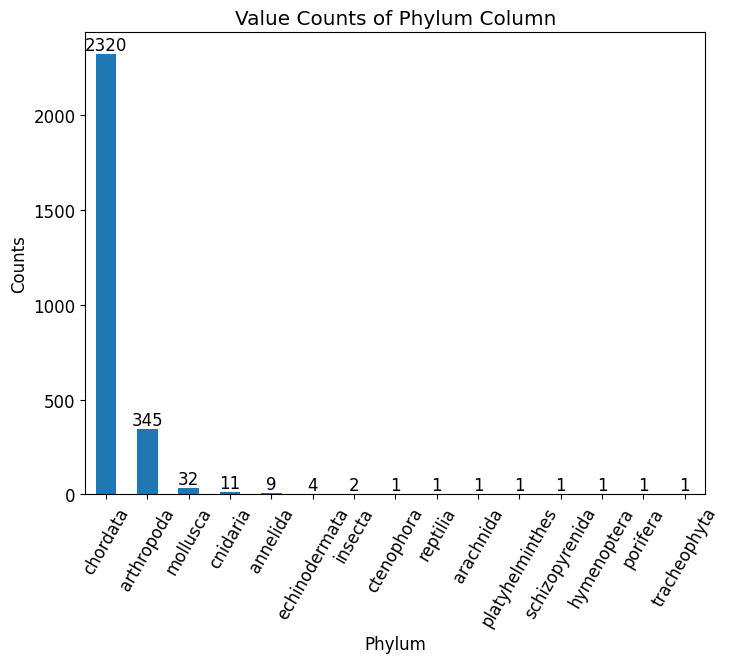

In [ ]:
value_counts = clean['Phylum'].str.lower().value_counts()

plt.figure(figsize=(8, 6))
ax = value_counts.plot(kind='bar')

plt.xticks(rotation=60)

plt.xlabel('Phylum')
plt.ylabel('Counts')
plt.title('Value Counts of Phylum Column')

for i, v in enumerate(value_counts.head(genus_top)):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Show the plot
plt.show()

## Diet

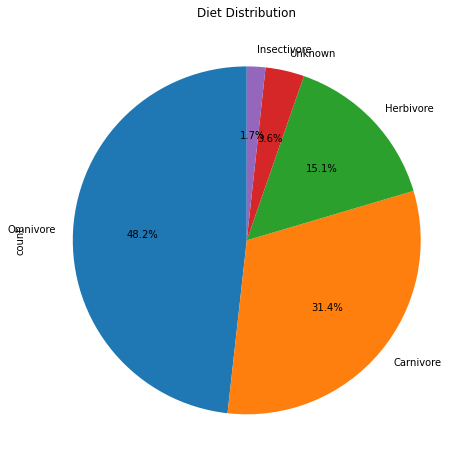

In [ ]:
diet_category = clean['Diet'].apply(lambda elem: elem.split(' ')[0] if pd.notna(elem) else 'Unknown').apply(lambda x: x if x.endswith('ore') else "Unknown")

plt.figure(figsize=(8, 8))  # Set the figure size

diet_category.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)

plt.title('Diet Distribution')

plt.show()

In [ ]:
clean.columns

Index(['Name', 'Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus',
       'Scientific Name', 'Text', 'Name Of Young', 'Fun Fact',
       'Estimated Population Size', 'Biggest Threat', 'Other Name(s)',
       'Gestation Period', 'Diet', 'Lifestyle', 'Location', 'Top Speed',
       'Lifespan', 'Weight', 'Length', 'Age of Sexual Maturity',
       'Age of Weaning', 'Predators', 'Type', 'Height', 'Age Of Independence',
       'Wingspan', 'Incubation Period', 'Age Of Fledgling', 'Migratory',
       'Venomous', 'Origin', 'Average Clutch Size', 'Average Spawn Size',
       'Age of Molting', 'Optimum pH Level', 'Behavior', 'Body',
       'Natural Habitat', 'Features'],
      dtype='object')

## Height + Length vs Weight

In [ ]:
def extract_numeric(value):
    # Use regular expression to find numeric part
    match = re.search(r'\d+', str(value))
    if match:
        return int(match.group())
    else:
        return None

In [ ]:
clean['Height_num'] = clean['Height'].apply(extract_numeric)
clean['Length_num'] = clean['Length'].apply(extract_numeric)
clean['Weight_num'] = clean['Weight'].apply(extract_numeric)


In [ ]:

# Filter rows where all three columns are not null
filtered_df = clean.dropna(subset=['Height_num', 'Length_num', 'Weight_num'])

# Extract the "Height," "Length," and "Weight" columns
height_values = filtered_df['Height_num']
length_values = filtered_df['Length_num']
weight_values = filtered_df['Weight_num']


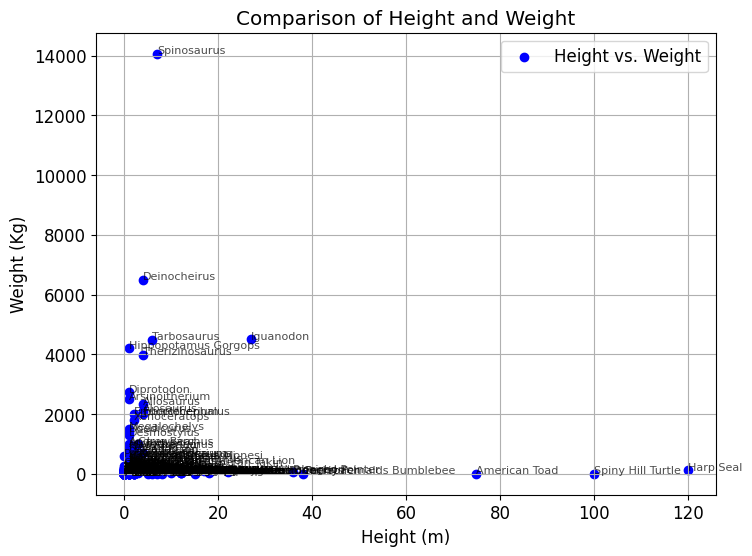

In [ ]:

# Create a scatter plot to compare "Height," "Length," and "Weight"
plt.figure(figsize=(8, 6))
plt.scatter(height_values, weight_values, c='b', marker='o', label='Height vs. Weight')
#plt.scatter(length_values, weight_values, c='g', marker='x', label='Length vs. Weight')

plt.xlabel('Height (m)')
plt.ylabel('Weight (Kg)')
plt.title('Comparison of Height and Weight')
plt.legend()
plt.grid(True)

# Add labels to the points to identify the rows
for i, name in enumerate(filtered_df['Name']):
    plt.annotate(name, (height_values.iloc[i], weight_values.iloc[i]), fontsize=8, alpha=0.7)
    #plt.annotate(name, (length_values.iloc[i], weight_values.iloc[i]), fontsize=8, alpha=0.7)

plt.show()

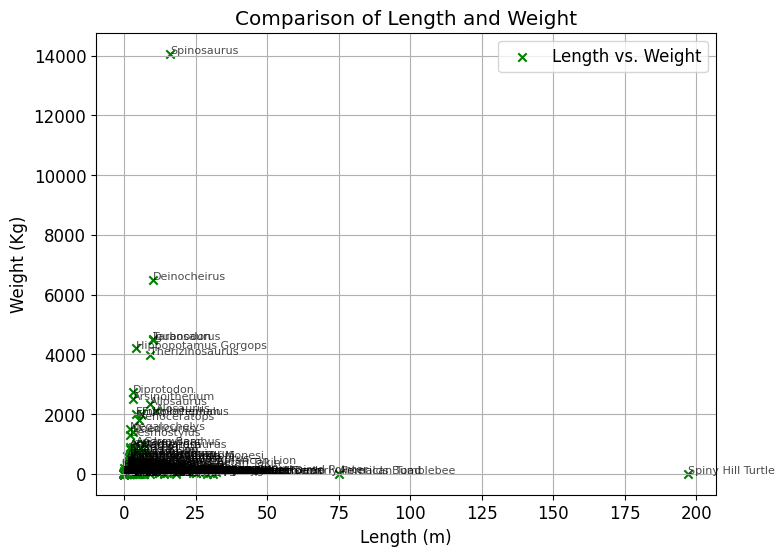

In [ ]:

# Create a scatter plot to compare "Height," "Length," and "Weight"
plt.figure(figsize=(8, 6))
#plt.scatter(height_values, weight_values, c='b', marker='o', label='Height vs. Weight')
plt.scatter(length_values, weight_values, c='g', marker='x', label='Length vs. Weight')

plt.xlabel('Length (m)')
plt.ylabel('Weight (Kg)')
plt.title('Comparison of Length and Weight')
plt.legend()
plt.grid(True)

# Add labels to the points to identify the rows
for i, name in enumerate(filtered_df['Name']):
    #plt.annotate(name, (height_values.iloc[i], weight_values.iloc[i]), fontsize=8, alpha=0.7)
    plt.annotate(name, (length_values.iloc[i], weight_values.iloc[i]), fontsize=8, alpha=0.7)

plt.show()

In [ ]:

# Create a scatter plot to compare "Height," "Length," and "Weight"
plt.figure(figsize=(8, 6))
plt.scatter(height_values, weight_values, c='b', marker='o', label='Height vs. Weight')
plt.scatter(length_values, weight_values, c='g', marker='x', label='Length vs. Weight')

plt.xlabel('Height (cm) / Length (cm)')
plt.ylabel('Weight (Kg)')
plt.title('Comparison of Height/Length and Weight')
plt.legend()
plt.grid(True)

# Add labels to the points to identify the rows
for i, name in enumerate(filtered_df['Name']):
    plt.annotate(name, (height_values.iloc[i], weight_values.iloc[i]), fontsize=8, alpha=0.7)
    plt.annotate(name, (length_values.iloc[i], weight_values.iloc[i]), fontsize=8, alpha=0.7)

plt.show()

## Not working yet

In [ ]:
clean['Length_Height'] = clean['Length_num'].fillna(clean['Height_num'])

In [ ]:
length_height_values = clean['Length_Height']

ValueError: x and y must be the same size

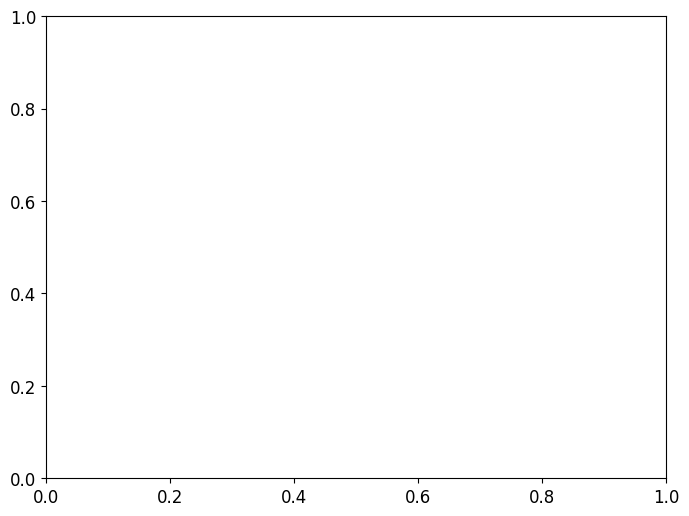

In [ ]:
# Create a scatter plot to compare "Height" and "Length"
plt.figure(figsize=(8, 6))
plt.scatter(length_height_values, weight_values, c='b', marker='o', label='Height vs. Length')
plt.xlabel('Length or Height (m)')
plt.ylabel('Weight (Kg)')
plt.title('Comparison of Height or Length and Weight')
plt.legend()
plt.grid(True)
plt.show()